In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime, timedelta

# 自訂 function 可重新 reload
from importlib import reload
from utils import util_inference_result
reload(util_inference_result)
from utils.util_inference_result import *

from sklearn.metrics import mean_squared_error

# Set path

In [ ]:
main_folder = '/home/hchuang/Documents/Project/SSSD_CP/src/results/ar1/'

# 設定 1  T=3
# sub_folder = 'ar1-6/T200_beta00.0001_betaT0.02/imputaiton_multiple_40k_test/' # M = 100
# sub_folder = 'ar1-6/T200_beta00.0001_betaT0.02/imputaiton_multiple_40k/' # M = 1000

# 設定 2  T=10
# sub_folder = 'ar1-4/T200_beta00.0001_betaT0.02/imputaiton_multiple_40k_test/' # M = 100
sub_folder = 'ar1-4/T200_beta00.0001_betaT0.02/imputaiton_multiple_40k/' # M = 1000


# 設定 2  T=100
# sub_folder = 'ar1-5/T200_beta00.0001_betaT0.02/imputaiton_multiple_10k_test/' # M = 100
sub_folder = 'ar1-5/T200_beta00.0001_betaT0.02/imputaiton_multiple_10k/' # M = 1000


# Read data and Calculate 2 metrics

The metrics are shown in the thesis 4.4.1

In [7]:
def metric_1(var1, var2):
    # output: metric 1 and its standard error
    var1 = var1.ravel()
    var2 = var2.ravel()
    stat = ((var1 - var2)**2)
    return round(mean_squared_error(var1, var2),5), round(np.std(stat),5)

def metric_2(var1):
    var1 = var1.ravel()
    stat = var1 - 1
    return round(np.mean(var1) - 1,5), round(np.std(stat),5)



In [8]:
# data = np.load(main_folder + sub_folder + 'original0.npy')

# last_pred = np.expand_dims(np.empty(data.shape), axis = 0)

# for i in range(1):
#     pred = np.load(main_folder + sub_folder + str(i) + '_imputation0.npy')
#     pred = np.expand_dims(pred, axis = 0)
#     last_pred = np.vstack((last_pred, pred))


# last_pred = last_pred[1:(last_pred.shape[0]+1),:,:,:]
# p = np.mean(last_pred[:,:,:,-1], axis = 0)   
# v = np.var(last_pred[:,:,:,-1], axis = 0)

# a = p
# b = data[:,:,-2].reshape(-1) # y_{T-1}
# c = data[:,:,-1].reshape(-1) # y_{T}

# # print(f'MSE to data = E[(p-y_T)^2] = {mean_squared_error(a, c)}')
# # print(f'E(p-0.8*y_T-1) = {np.mean(a-b*0.8)}')
# # print(f'var(p-0.8*y_T-1) = {np.var(a-b*0.8)}')

# print(f'metric 1 = E[(p-0.8*y_T-1)^2] = {metric_1(a, b*0.8)}')
# print(f'metric 2 = E[var(\hat(y))] = {metric_2(v)}')

In [9]:
data = np.load(main_folder + sub_folder + 'original0.npy')

last_pred = np.expand_dims(np.empty(data.shape), axis = 0)

for i in range(5):
    pred = np.load(main_folder + sub_folder + str(i) + '_imputation0.npy')
    pred = np.expand_dims(pred, axis = 0)
    last_pred = np.vstack((last_pred, pred))


last_pred = last_pred[1:(last_pred.shape[0]+1),:,:,:]
p = np.mean(last_pred[:,:,:,-1], axis = 0)   
v = np.var(last_pred[:,:,:,-1], axis = 0)

a = p
b = data[:,:,-2].reshape(-1) # y_{T-1}
c = data[:,:,-1].reshape(-1) # y_{T}

# print(f'MSE to data = E[(p-y_T)^2] = {mean_squared_error(a, c)}')
# print(f'E(p-0.8*y_T-1) = {np.mean(a-b*0.8)}')
# print(f'var(p-0.8*y_T-1) = {np.var(a-b*0.8)}')


print(f'metric 1 = E[(p-0.8*y_T-1)^2] = {metric_1(a, b*0.8)}')
print(f'metric 2 = E[var(\hat(y))] = {metric_2(v)}')

FileNotFoundError: [Errno 2] No such file or directory: '/home/hchuang/Documents/Project/SSSD_CP/src/results/ar1/ar1-5/T200_beta00.0001_betaT0.02/imputaiton_multiple_10k/0_imputation0.npy'

In [46]:
data = np.load(main_folder + sub_folder + 'original0.npy')

last_pred = np.expand_dims(np.empty(data.shape), axis = 0)

for i in range(100):
    pred = np.load(main_folder + sub_folder + str(i) + '_imputation0.npy')
    pred = np.expand_dims(pred, axis = 0)
    last_pred = np.vstack((last_pred, pred))


last_pred = last_pred[1:(last_pred.shape[0]+1),:,:,:]
p = np.mean(last_pred[:,:,:,-1], axis = 0)   
v = np.var(last_pred[:,:,:,-1], axis = 0)

a = p
b = data[:,:,-2].reshape(-1) # y_{T-1}
c = data[:,:,-1].reshape(-1) # y_{T}

# print(f'MSE to data = E[(p-y_T)^2] = {mean_squared_error(a, c)}')
# print(f'E(p-0.8*y_T-1) = {np.mean(a-b*0.8)}')
# print(f'var(p-0.8*y_T-1) = {np.var(a-b*0.8)}')

print(f'metric 1 = E[(p-0.8*y_T-1)^2] = {metric_1(a, b*0.8)}')
print(f'metric 2 = E[var(\hat(y))] = {metric_2(v)}')

metric 1 = E[(p-0.8*y_T-1)^2] = (0.39153, 0.53063)
metric 2 = E[var(\hat(y))] = (-0.96229, 0.03495)


In [47]:
data = np.load(main_folder + sub_folder + 'original0.npy')

last_pred = np.expand_dims(np.empty(data.shape), axis = 0)

for i in range(1000):
    pred = np.load(main_folder + sub_folder + str(i) + '_imputation0.npy')
    pred = np.expand_dims(pred, axis = 0)
    last_pred = np.vstack((last_pred, pred))


last_pred = last_pred[1:(last_pred.shape[0]+1),:,:,:]
p = np.mean(last_pred[:,:,:,-1], axis = 0)   
v = np.var(last_pred[:,:,:,-1], axis = 0)

a = p
b = data[:,:,-2].reshape(-1) # y_{T-1}
c = data[:,:,-1].reshape(-1) # y_{T}

print(f'metric 1 = E[(p-0.8*y_T-1)^2] = {metric_1(a, b*0.8)}')
print(f'metric 2 = E[var(\hat(y))] = {metric_2(v)}')

metric 1 = E[(p-0.8*y_T-1)^2] = (0.39099, 0.5295)
metric 2 = E[var(\hat(y))] = (-0.96208, 0.03425)


# M vs mterics

In [165]:
last_pred.shape

(800, 1000, 1, 10)

In [166]:
data = np.load(main_folder + sub_folder + 'original0.npy')
last_pred = np.expand_dims(np.empty(data.shape), axis = 0)

M = 800
# stack M predictions
for i in range(M):
    pred = np.load(main_folder + sub_folder + str(i) + '_imputation0.npy')
    pred = np.expand_dims(pred, axis = 0)
    last_pred = np.vstack((last_pred, pred))
last_pred = last_pred[1:(last_pred.shape[0]+1),:,:,:] # (M,N,1,T): M = # of predictions, N = # of test data, T = length of ts

# np.random.shuffle(last_pred)

N = 1000 # size of test data

metric_1_ls = []
metric_2_ls = []
for m in range(1,M,1):
    p = np.mean(last_pred[0:m,0:N,:,-1], axis = 0)   
    v = np.var(last_pred[0:m,0:N,:,-1], axis = 0)

    a = p
    b = data[0:N,:,-2].reshape(-1) # y_{T-1}
    c = data[0:N,:,-1].reshape(-1) # y_{T}

    metric_1_ls.append(metric_1(a, b*0.8))
    metric_2_ls.append(metric_2(v))

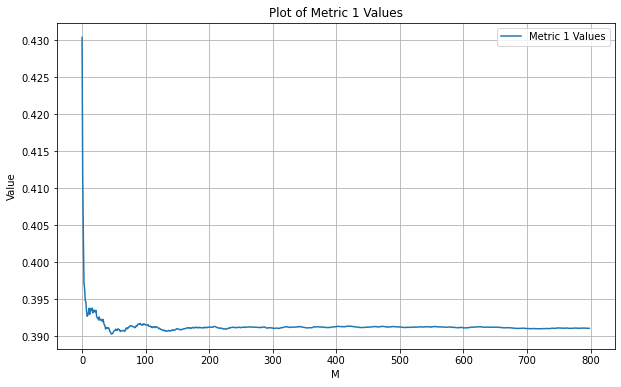

In [167]:
plt.figure(figsize=(10,6))
plt.plot(metric_1_ls, label='Metric 1 Values')
plt.xlabel('M')
plt.ylabel('Value')
plt.title('Plot of Metric 1 Values')
plt.legend()
# plt.ylim((0.39,0.43))
plt.grid(True)
plt.show()

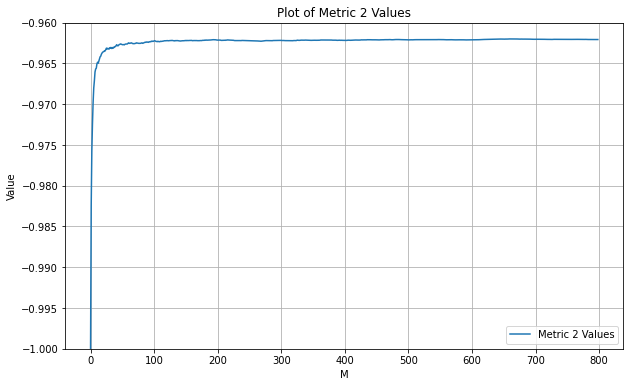

In [171]:
plt.figure(figsize=(10,6))
plt.plot(metric_2_ls, label='Metric 2 Values')
plt.xlabel('M')
plt.ylabel('Value')
plt.title('Plot of Metric 2 Values')
plt.legend()
plt.ylim(-1,-0.96)
plt.grid(True)
plt.show()

# CI

In [16]:
predictions = np.squeeze(last_pred[:,:,:,-1]) # shape:(M,N), \hat{y}_{T,i}^{(m)} i = 1,...,N, m = 1,...,M
true_data_all_test = np.squeeze(data) # shape:(N,T), y_{T,i} i = 1,...,N

pre_lag1 = true_data_all_test.shape[1]-1-1 # T-1 is the previous position, but python is start from 0, so do another -1


In [17]:
L, U = pred_interval(predictions, beta = 0.05)
print(L.shape)

(1000,)


In [18]:
mean_true = true_data_all_test[:,pre_lag1]*0.8
L_true = true_data_all_test[:,pre_lag1]*0.8 - 1.96
U_true = true_data_all_test[:,pre_lag1]*0.8 + 1.96
print(mean_true.shape)
print(L_true.shape)

(1000,)
(1000,)


## Average length

In [19]:
len_SSSD = U-L
len_true = 1.96*2

print(np.mean(len_SSSD))
print(np.std(len_SSSD))

3.9636748073579975
0.14422651542911197


## Overlap proportion

In [20]:
def calculate_overlap_proportion(interval1, interval2):
    # Unpack the intervals
    a1, a2 = interval1
    b1, b2 = interval2
    
    # Calculate the length of the first interval
    length_interval1 = b2 - b1
    
    # Find the overlap range
    overlap_start = max(a1, b1)
    overlap_end = min(a2, b2)
    
    # Calculate overlap length (only if overlap exists)
    overlap_length = max(0, overlap_end - overlap_start)
    
    # Calculate the proportion of overlap relative to the first interval
    overlap_proportion = overlap_length / length_interval1 if length_interval1 > 0 else 0
    
    return overlap_proportion
def calculate_mean_overlap_proportion(intervals1, intervals2):
    proportions = []
    
    for i in range(len(intervals1[0])):
        a1,b1 = intervals1
        a2,b2 = intervals2
        proportion = calculate_overlap_proportion((a1[i],b1[i]), (a2[i],b2[i]))
        proportions.append(proportion)
    
    # Calculate the mean of the overlap proportions
    return np.mean(proportions), proportions

In [21]:
mean_overlap, proportions = calculate_mean_overlap_proportion((L,U), (L_true,U_true))
print(f"Mean overlap proportion: {mean_overlap:.4f}")

Mean overlap proportion: 0.9028


## Covergae rate
要跟 0.8Y_{T-1} 比，還是跟 Y_{T} 比較？

In [22]:
# print(coverage_rate(L, U, mean_true))
# print(coverage_rate(L_true, U_true,  mean_true))

# print(coverage_rate(L, U, true_data_all_test[:,9]))
# print(coverage_rate(L_true, U_true,  true_data_all_test[:,9]))

1.0
1.0


IndexError: index 9 is out of bounds for axis 1 with size 3

In [23]:
true_data_all_test.shape

(1000, 3)